In [1]:
import numpy as np
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.datasets import mnist
from keras.optimizers import Adam
from keras.layers import BatchNormalization
import keras.callbacks as cb
from matplotlib import pyplot as plt

/opt/conda/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## Loading the data

In [2]:
# Load pre-shuffled MNIST data into train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 5s 0us/step


## Exploring the data and preparing it

(60000, 28, 28)
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 25

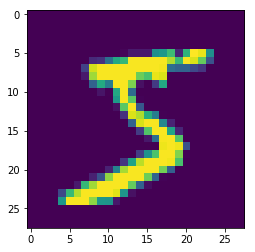

In [4]:
print(X_train.shape)

print(X_train[0])
plt.imshow(X_train[0])

In [5]:
# Reshape input data
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

print(X_train.shape)

(60000, 28, 28, 1)


In [6]:
# Convert data type and normalize values
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

print(X_train[0])

[[[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0. 

In [7]:
print(y_train.shape)
print(y_train[:10])

(60000,)
[5 0 4 1 9 2 1 3 1 4]


In [8]:
# Convert output labels from single numbers to categorical one-hot encoding
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

print(Y_train.shape)
print(Y_train[:10])

(60000, 10)
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


## Create many models with different hidden layer arrangements

### Model 1

In [9]:
model_1 = Sequential()
model_1.add(Conv2D(32, kernel_size=(3, 3), strides=(1, 1), activation='relu', input_shape=(28,28, 1), padding="same"))
model_1.add(Conv2D(32, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding="same"))
model_1.add(MaxPooling2D(pool_size=(2,2)))
model_1.add(Dropout(0.25))

model_1.add(Flatten())
model_1.add(Dense(128, activation='relu'))
model_1.add(Dropout(0.5))
model_1.add(Dense(10, activation='softmax'))

### Model 2

In [10]:
model_2 = Sequential()
model_2.add(Conv2D(32, kernel_size=(3, 3), strides=(1, 1), activation='relu', input_shape=(28,28, 1), padding="same"))
model_2.add(Conv2D(32, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding="same"))
model_2.add(MaxPooling2D(pool_size=(2,2)))
model_2.add(Dropout(0.25))

model_2.add(Conv2D(64, kernel_size=(3, 3), strides=(1, 1), activation='relu', input_shape=(28,28, 1), padding="same"))
model_2.add(Conv2D(64, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding="same"))
model_2.add(MaxPooling2D(pool_size=(2,2)))
model_2.add(Dropout(0.25))

model_2.add(Flatten())
model_2.add(Dense(128, activation='relu'))
model_2.add(Dropout(0.5))
model_2.add(Dense(10, activation='softmax'))

### Model 3

In [11]:
model_3 = Sequential()
model_3.add(Conv2D(32, kernel_size=(3, 3), strides=(1, 1), activation='relu', input_shape=(28,28, 1), padding="same"))
model_3.add(Conv2D(32, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding="same"))
model_3.add(MaxPooling2D(pool_size=(2,2)))
model_3.add(Dropout(0.7))

model_3.add(Conv2D(64, kernel_size=(3, 3), strides=(1, 1), activation='relu', input_shape=(28,28, 1), padding="same"))
model_3.add(Conv2D(64, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding="same"))
model_3.add(MaxPooling2D(pool_size=(2,2)))
model_3.add(Dropout(0.7))

model_3.add(Flatten())
model_3.add(Dense(128, activation='relu'))
model_3.add(Dropout(0.7))
model_3.add(Dense(10, activation='softmax'))

### Model 4

In [12]:
model_4 = Sequential()
model_4.add(Conv2D(32, kernel_size=(3, 3), strides=(1, 1), activation='relu', input_shape=(28,28, 1), padding="same"))
model_4.add(Conv2D(32, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding="same"))
model_4.add(MaxPooling2D(pool_size=(2,2)))
model_4.add(Dropout(0.1))

model_4.add(Conv2D(64, kernel_size=(3, 3), strides=(1, 1), activation='relu', input_shape=(28,28, 1), padding="same"))
model_4.add(Conv2D(64, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding="same"))
model_4.add(MaxPooling2D(pool_size=(2,2)))
model_4.add(Dropout(0.1))

model_4.add(Flatten())
model_4.add(Dense(128, activation='relu'))
model_4.add(Dropout(0.1))
model_4.add(Dense(10, activation='softmax'))

### Model 5: like model 2 (the best result) with BatchNormalization

In [13]:
model_5 = Sequential()
model_5.add(Conv2D(32, kernel_size=(3, 3), strides=(1, 1), activation='relu', input_shape=(28,28, 1), padding="same"))
model_5.add(Conv2D(32, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding="same"))
model_5.add(MaxPooling2D(pool_size=(2,2)))
model_5.add(Dropout(0.25))

model_5.add(Conv2D(64, kernel_size=(3, 3), strides=(1, 1), activation='relu', input_shape=(28,28, 1), padding="same"))
model_5.add(Conv2D(64, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding="same"))
model_5.add(MaxPooling2D(pool_size=(2,2)))
model_5.add(Dropout(0.25))

model_5.add(BatchNormalization())

model_5.add(Flatten())
model_5.add(Dense(128, activation='relu'))
model_5.add(Dropout(0.5))
model_5.add(Dense(10, activation='softmax'))

## Training function

In [15]:
def compile_and_fit_model(model, optimizer):    
    model.compile(loss='categorical_crossentropy',
                  optimizer=optimizer,
                  metrics=['accuracy'])
    
    model.fit(X_train, Y_train, batch_size=32, epochs=5, verbose=1)
        
    score = model.evaluate(X_test, Y_test, verbose=1)
    print("Accuracy: {0}".format(score[1]))

## Test each model with different learning rates and check the final accuracy.
## This takes quite some time per training. 15-45 minutes :(

### Model 1

In [17]:
adam = Adam(lr=0.001)
compile_and_fit_model(model_1, adam)

Epoch 1/5
60000/60000 [==============================] - 197s 3ms/step - loss: 0.1697 - acc: 0.9485
Epoch 2/5
60000/60000 [==============================] - 196s 3ms/step - loss: 0.0842 - acc: 0.9745
Epoch 3/5
60000/60000 [==============================] - 194s 3ms/step - loss: 0.0639 - acc: 0.9801
Epoch 4/5
60000/60000 [==============================] - 189s 3ms/step - loss: 0.0516 - acc: 0.9838
Epoch 5/5
10000/10000 [==============================] - 7s 695us/step
Accuracy: 0.9907


In [18]:
adam = Adam(lr=0.01)
compile_and_fit_model(model_1, adam)

Epoch 1/5
60000/60000 [==============================] - 202s 3ms/step - loss: 0.2055 - acc: 0.9428
Epoch 2/5
60000/60000 [==============================] - 189s 3ms/step - loss: 0.1732 - acc: 0.9525
Epoch 3/5
60000/60000 [==============================] - 193s 3ms/step - loss: 0.1726 - acc: 0.9546
Epoch 4/5
60000/60000 [==============================] - 187s 3ms/step - loss: 0.1811 - acc: 0.9530
Epoch 5/5
10000/10000 [==============================] - 7s 721us/step
Accuracy: 0.9837


In [19]:
adam = Adam(lr=0.005)
compile_and_fit_model(model_1, adam)

Epoch 1/5
60000/60000 [==============================] - 188s 3ms/step - loss: 0.1095 - acc: 0.9727
Epoch 2/5
60000/60000 [==============================] - 193s 3ms/step - loss: 0.0937 - acc: 0.9758
Epoch 3/5
60000/60000 [==============================] - 179s 3ms/step - loss: 0.0874 - acc: 0.9770
Epoch 4/5
60000/60000 [==============================] - 194s 3ms/step - loss: 0.0854 - acc: 0.9778
Epoch 5/5
10000/10000 [==============================] - 7s 733us/step
Accuracy: 0.9877


### Model 2

In [20]:
adam = Adam(lr=0.001)
compile_and_fit_model(model_2, adam)

Epoch 1/5
60000/60000 [==============================] - 333s 6ms/step - loss: 0.2073 - acc: 0.9356
Epoch 2/5
60000/60000 [==============================] - 321s 5ms/step - loss: 0.0789 - acc: 0.9763
Epoch 3/5
60000/60000 [==============================] - 295s 5ms/step - loss: 0.0601 - acc: 0.9829
Epoch 4/5
60000/60000 [==============================] - 277s 5ms/step - loss: 0.0523 - acc: 0.9848
Epoch 5/5
10000/10000 [==============================] - 12s 1ms/step
Accuracy: 0.9932


### Model 3

In [22]:
adam = Adam(lr=0.001)
compile_and_fit_model(model_3, adam)

Epoch 1/5
60000/60000 [==============================] - 345s 6ms/step - loss: 0.5048 - acc: 0.8381
Epoch 2/5
60000/60000 [==============================] - 295s 5ms/step - loss: 0.2074 - acc: 0.9406
Epoch 3/5
60000/60000 [==============================] - 280s 5ms/step - loss: 0.1674 - acc: 0.9524
Epoch 4/5
60000/60000 [==============================] - 282s 5ms/step - loss: 0.1507 - acc: 0.9567
Epoch 5/5
10000/10000 [==============================] - 12s 1ms/step
Accuracy: 0.9903


### Model 4

In [23]:
adam = Adam(lr=0.001)
compile_and_fit_model(model_4, adam)

Epoch 1/5
60000/60000 [==============================] - 281s 5ms/step - loss: 0.1224 - acc: 0.9616
Epoch 2/5
60000/60000 [==============================] - 280s 5ms/step - loss: 0.0437 - acc: 0.9867
Epoch 3/5
60000/60000 [==============================] - 295s 5ms/step - loss: 0.0310 - acc: 0.9901
Epoch 4/5
60000/60000 [==============================] - 310s 5ms/step - loss: 0.0257 - acc: 0.9922
Epoch 5/5
10000/10000 [==============================] - 13s 1ms/step
Accuracy: 0.9902


### Model 5

In [24]:
adam = Adam(lr=0.001)
compile_and_fit_model(model_5, adam)

Epoch 1/5
60000/60000 [==============================] - 341s 6ms/step - loss: 0.1886 - acc: 0.9422
Epoch 2/5
60000/60000 [==============================] - 364s 6ms/step - loss: 0.0913 - acc: 0.9736
Epoch 3/5
60000/60000 [==============================] - 341s 6ms/step - loss: 0.0715 - acc: 0.9792
Epoch 4/5
60000/60000 [==============================] - 356s 6ms/step - loss: 0.0611 - acc: 0.9827
Epoch 5/5
10000/10000 [==============================] - 16s 2ms/step
Accuracy: 0.9893
